# Defining "del" operator ($\nabla$)



The "del" operator is defined to be: 
$\large \nabla = \bf{i}\frac{\partial}{\partial x} + \bf{j}\frac{\partial}{\partial y} + \bf{k}\frac{\partial}{\partial z}$

This is the same in 2D, only we ommit the $\bf{k}$ term

# Defining the Divergence ("div") of a vector field ($\bf{F}$) 

$div\bf{F}$, or $\large \nabla \cdot \bf{F}$, is the dot product of del with $\bf{F}$. 

Now, if $\bf{F}=\langle P,Q,R \rangle$ then 
$${div} \bf{F}=\nabla \cdot \bf{F} = \big\langle \frac{\partial}{\partial x},\frac{\partial}{\partial y},\frac{\partial}{\partial z} \big\rangle \cdot \langle P,Q,R \rangle$$
$$= \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y} + \frac{\partial R}{\partial z}$$

This means $div\bf{F}$ is a scalar


# Defining the Curl of a Vector field ($\bf{F}$)

$curl\bf{F}$, or $\nabla \times \bf{F}$, is the cross product of del with $\bf{F}$.

Using the same vector field as above, 
$$curl\bf{F} = \nabla \times \bf{F} = \big\langle \frac{\partial}{\partial x},\frac{\partial}{\partial y},\frac{\partial}{\partial z} \big\rangle \times \langle P,Q,R \rangle = \begin{vmatrix} \bf{i} & \bf{j} & \bf{k} \\ \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z} \\ P & Q & R \end{vmatrix} $$


$$= \bigg( \frac{\partial R}{\partial y} - \frac{\partial Q}{\partial z} \bigg)\bf{i} + \bigg( \frac{\partial P}{\partial z} - \frac{\partial R}{\partial x} \bigg)\bf{j} + \bigg( \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \bigg)\bf{k}$$

For the 2D cross product (i.e. $\bf{F}=\langle P,Q \rangle$) we get,
$$curl\bf{F}=\begin{vmatrix} \bf{i} & \bf{j} & \bf{k} \\  \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & 0 \\ P & Q & 0 \end{vmatrix} = \bigg( \frac{\partial P}{\partial y} - \frac{\partial Q}{\partial x} \bigg)\bf{k}$$

This means $curl\bf{F}$ a vector.

--------------------------------------------------

# Plotting Divergence and Curl Functions

- Hand write the expressions for f_div/curl 
- Compute the (u,v) values for few points for f_div/curl
- Compute Curl and Div at same points for f_div/curl

-- Check code to hand computations
 
pick function wiht non-const, non-0 div (write out by hand) -> check value at (1,2) and (2,1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn
seaborn.set_style('white')  # noqa: E402
seaborn.set_context("poster")  # noqa: E402


### For the Divergent function
If $\bf{F}=(2x)\hat{i}+(2y)\hat{j}$, 

then $\nabla \cdot \bf{F} = 4$, and $\nabla \times \bf{F} =0$
### For the Curl function
If $\bf{F}=(-y)\hat{i}+(x)\hat{j}$, 

then $\nabla \times \bf{F} = -2\hat{k}$, and $\nabla \cdot \bf{F} =0$

In [2]:
def f_div(x,y):
    '''
    Function with non-zero divergence everywhere and zero curl
    '''
    u = 2*x
    v = 2*y
#     u = x**2
#     v = y**2
    return u,v

def f_curl(x,y):
    '''
    Function with non-zero Curl everywhere and zero divergence
    '''
    u = -y
    v = x
#     u = y**2
#     v = x**2
    return u,v

In [31]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def colorbar(mappable):
    """Create a colorbar that obeys tight_layout, etc.

    Stolen from: http://joseph-long.com/writing/colorbars/

    Parameters
    ----------
    mappable
        Return value from e.g. `matplotlib.imshow()` or `matplotlib.scatter()`.
    """
    try:
        # QuadContourSet is not a Artist, so doesn't have `axes`
        ax = mappable.axes
    except AttributeError:
        ax = mappable.ax
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
     
    return fig.colorbar(mappable, cax=cax)

basic_cols=['#ff0000', '#303030', '#0099ff']
blue_to_red=LinearSegmentedColormap.from_list('mycmap', basic_cols)

def div_field(x, y):
    u,v = f_div(x,y)
    #plt.figure(figsize=(5,5))
    plt.title("Divergent Vector Field")
    plt.quiver(x, y, u, v, cmap=blue_to_red, pivot='mid')
    plt.show()
    return u,v
    
def curl_field(x, y):
    u,v = f_curl(x,y)
    #plt.figure(figsize=(5,5))
    plt.title("Curl Vector Field")
    plt.quiver(x, y, u, v, cmap=blue_to_red, pivot='mid')
    plt.show()

    return u,v
    
def calc_div(X, Y, u, v, x, y):
    uDel = np.gradient(u,y,x)
    vDel = np.gradient(v,y,x)
    divergence = uDel[1]+vDel[0] #dudx+dvdy
    return divergence

def calc_curl(X, Y, u, v, x, y):
    uDel = np.gradient(u,y,x)
    vDel = np.gradient(v,y,x)
    curl = uDel[0]-vDel[1] #dudy-dvdx
    return curl

def plot_div(ax, X, Y, u, v, x, y, vmin=None, vmax=None):
    divergence = calc_div(X,Y,u,v,x,y)
    #fig = plt.figure(figsize=(5,5))
    #ax = fig.add_subplot(111)
    plt.title('Divergence')
    extent = [x.min(),x.max(),y.min(),y.max()]
    div_plot = ax.imshow(divergence, extent=extent, vmin=vmin, vmax=vmax, cmap=blue_to_red);
    
    #colorbar(div_plot)
    #plt.show();
    return div_plot, extent
    
def plot_curl(ax, X, Y, u, v, x, y, vmin=None, vmax=None):
    curl = calc_curl(X,Y,u,v,x,y)
    #fig = plt.figure(figsize=(5,5))
    #ax = fig.add_subplot(111)
    plt.title('Curl')
    extent =  [x.min(),x.max(),y.min(),y.max()]
    curl_plot = ax.imshow(curl, extent=extent, vmin=vmin, vmax=vmax, cmap=blue_to_red);

    #colorbar(curl_plot)
    #plt.show();
    return curl_plot, extent

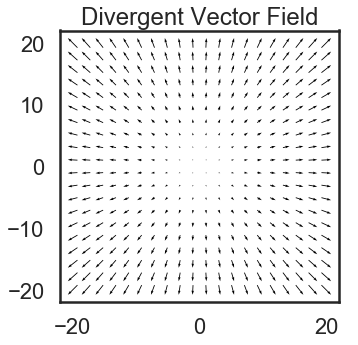

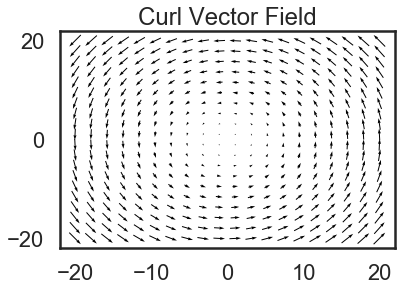

(<matplotlib.image.AxesImage at 0x24f36576a20>, [-20.0, 20.0, -20.0, 20.0])

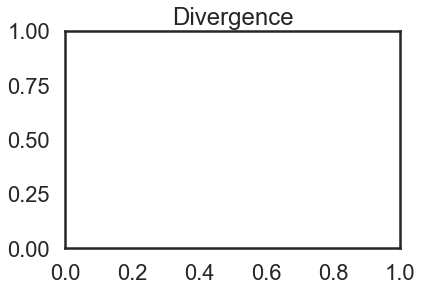

In [32]:
n = 20
x, dx = np.linspace(-n, n, n, retstep=True)
y, dy = np.linspace(-n, n, n, retstep=True)
X,Y = np.meshgrid(x,y)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

u_div,v_div = div_field(X,Y)
div_plot, extent = plot_div(ax, X,Y,u_div,v_div,x,y)
plot_curl(ax,X,Y,u_div,v_div,x,y,vmin=-10,vmax=10)

u_curl,v_curl = curl_field(X,Y)
curl_plot,extent = plot_curl(ax,X,Y,u_curl,v_curl,x,y)
plot_div(ax,X,Y,u_curl,v_curl,x,y,vmin=-10,vmax=10)

- np array ordering (row x column or column x row)
- chekcing divergence and curl 
- step size and working with np.gradient 


In [7]:
from pathlib import Path
import os
import pickle

In [8]:
def uv_mean(xlim, ylim, xx, yy, uu, vv, nx, ny):
    """Compute the mean of uu and vv on a grid within bbox."""
    #ny = int(nx*(ylim[1]-ylim[0]) / (xlim[1]-xlim[0]))    NEEDS WORK FOR ROTATED CCDs
    uMean = np.zeros((nx-1, ny-1))
    vMean = np.zeros((nx-1, ny-1))
    xMean = np.zeros((nx-1, ny-1))
    yMean = np.zeros((nx-1, ny-1))
    ww = np.linspace(xlim[0], xlim[1], nx)
    hh = np.linspace(ylim[0], ylim[1], ny)
    xrange = np.array([((xx >= w0) & (xx <= w1)) for w0, w1 in zip(ww[:-1], ww[1:])], dtype=bool)
    yrange = np.array([((yy >= w0) & (yy <= w1)) for w0, w1 in zip(hh[:-1], hh[1:])], dtype=bool)
    dx = ww[1]-ww[0]
    dy = hh[1]-hh[0]
    for i, (w0, w1) in enumerate(zip(ww[:-1], ww[1:])):
        for j, (h0, h1) in enumerate(zip(hh[:-1], hh[1:])):
            inside = xrange[i] & yrange[j]
            xMean[i, j] = (w0 + w1)/2
            yMean[i, j] = (h0 + h1)/2
            uMean[i, j] = np.mean(uu[inside]) #np slicing 
            vMean[i, j] = np.mean(vv[inside])

    return xMean, yMean, uMean, vMean, dx, dy


def plot_quiver(ax, xx, yy, uu, vv, ccd, label):
    """Make a quiver plot of the astrometry error vectors."""
    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    color = cycle[0] if 'jointcal' in label else cycle[1]
    scale = 0.015 if 'mean' in label else 1
    
    cmap = ListedColormap(seaborn.color_palette('husl',256).as_hex())
    
    angle = np.nan_to_num(np.arctan2(vv,uu))
    Q = ax.quiver(xx, yy, uu, vv, np.degrees(angle), cmap=cmap, units='x', pivot='tail', scale=scale, width=50,
                  headwidth=4, clip_on=False)
    
    length = 20  #0.5/scale if 'mean' in label else 100
    key = ax.quiverkey(Q, 0.31, 0.15, length, '%s mas'%(length), angle=0,
                       coordinates='figure', labelpos='W', fontproperties={'size': 24})

    fig.subplots_adjust()
    colorbar(Q);

    filename = Path("plots/quiver-%s-%s.png"%(ccd, label))

In [9]:
import glob
#name = 'single'
name = 'jointcal'
pattern = os.path.abspath('focalplane/%s/pickles/quiverData-%s-*.pickle'%(name, name))
files = glob.glob(pattern)

from collections import namedtuple
UVData = namedtuple("uvmean", ["x", "y", "u", "v", "xlim", "ylim", "dx", "dy",]) 

#xMean = yMean = uMean = vMean = None
data = {}
for file in files:
    with open(os.path.expanduser(file), 'rb') as infile:
        xx, yy, uu, vv, xlim, ylim, ccd = pickle.load(infile)
        xTemp, yTemp, uTemp, vTemp, dxTemp, dyTemp = uv_mean(xlim, ylim, xx, yy, uu, vv, 10, 20)
        data[ccd] = UVData(xTemp.copy(), yTemp.copy(), uTemp.copy(), vTemp.copy(), xlim, ylim, dxTemp, dyTemp)

C:\Users\hsham\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\hsham\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
print(data[ccd].dx)
print(data[ccd].dy)

print(data[ccd].x.shape)
print(data[ccd].y.shape)




227.91179946036937
219.8721816714442
(9, 19)
(9, 19)


C:\Users\hsham\Anaconda3\lib\site-packages\matplotlib\image.py:863: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=227.59021171429777, right=227.59021171429777
  self.axes.set_xlim((xmin, xmax), auto=None)
C:\Users\hsham\Anaconda3\lib\site-packages\matplotlib\image.py:865: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=219.7975240140804, top=219.7975240140804
  self.axes.set_ylim((ymin, ymax), auto=None)
C:\Users\hsham\Anaconda3\lib\site-packages\matplotlib\image.py:863: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=227.5632845679702, right=227.5632845679702
  self.axes.set_xlim((xmin, xmax), auto=None)
C:\Users\hsham\Anaconda3\lib\site-packages\matplotlib\image.py:865: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatic

Text(0.5, 1.0, 'Divergence of Full Focal Plane')

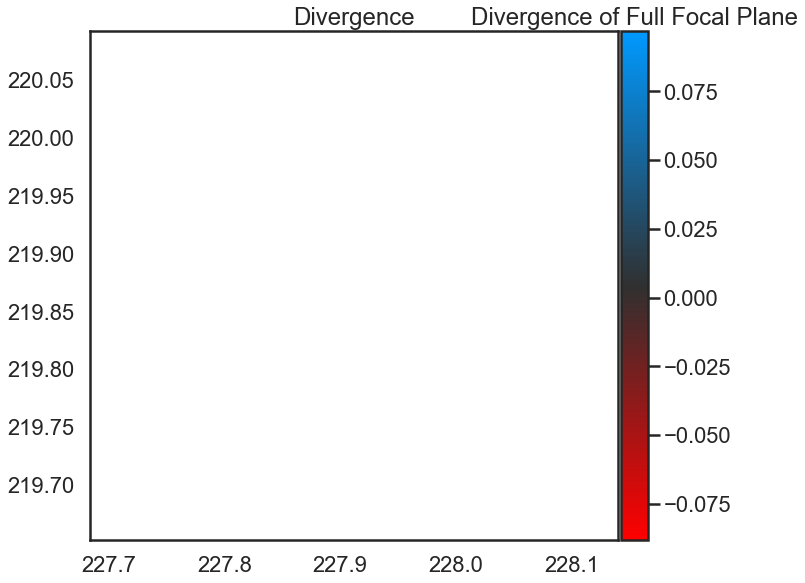

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#extent = []

for ccd in data:
    div_plot = plot_div(ax, data[ccd].x, data[ccd].y, data[ccd].u, data[ccd].v, data[ccd].dx, data[ccd].dy)
    #extent.append(plot_div(ax, data[ccd].x, data[ccd].y, data[ccd].u, data[ccd].v, data[ccd].dx, data[ccd].dy))
colorbar(div_plot)
#extent = np.array(extent, dtype=float)
plt.title('Divergence of Full Focal Plane')
#ax.set_ylim(extent[:,0].min(),extent[:,1].max())
#ax.set_xlim(extent[:,2].min(),extent[:,3].max());